<a href="https://colab.research.google.com/github/husnul122430099/test/blob/main/Tubes_AI_Solar_Power_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library & Mount Google Drive

In [1]:
# === IMPORT LIBRARY ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === MOUNT GOOGLE DRIVE ===
drive.mount('/content/drive')


Mounted at /content/drive


Load Dataset

In [3]:
# === LOAD DATASET ===
file_path = "/content/drive/MyDrive/Tugas Fathi/Plant_1_Generation_Data.csv"
df = pd.read_csv(file_path)

df.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


Data Understanding & Preprocessing

In [4]:
# === DATA UNDERSTANDING ===
print(df.info())
print(df.describe())
print(df.isnull().sum())

# === PREPROCESSING ===
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df.fillna(method='ffill', inplace=True)

# Feature utama
features = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
None
        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    41

/tmp/ipython-input-2904232017.py:7: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
/tmp/ipython-input-2904232017.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Exploratory Data Analysis (EDA)

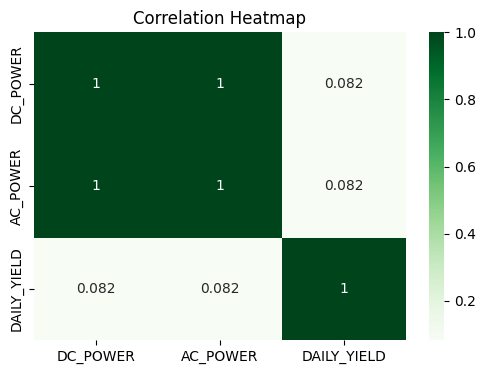

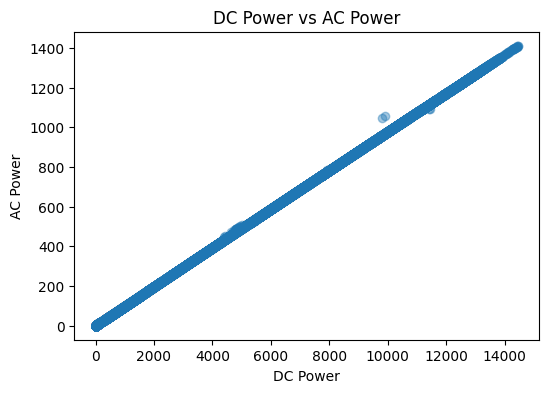

Regression Modeling (Prediksi AC Power)

In [6]:
# === SPLIT DATA ===
X = df[['DC_POWER']]
y = df['AC_POWER']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === TRAINING MODEL ===
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# === PREDIKSI ===
y_pred = reg_model.predict(X_test)



Evaluasi Model Regresi

In [7]:
# === EVALUASI ===
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")


MAE  : 0.71
RMSE : 1.46
R²   : 1.00


Clustering Inverter (K-Means)

In [8]:
# === AGREGASI PER INVERTER ===
cluster_df = df.groupby('SOURCE_KEY')[features].mean()

# === NORMALISASI ===
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# === K-MEANS ===
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(scaled_data)

cluster_df.head()


,DC_POWER,AC_POWER,DAILY_YIELD,Cluster
SOURCE_KEY,,,,
1BY6WEcLGh8j5v7,2873.720981,281.124073,3230.658151,2
1IF53ai7Xc0U56Y,3226.336768,315.488026,3356.882104,0
3PZuoBAID5Wc2HD,3221.015673,314.967354,3356.856357,0
7JYdWkrLSPkdwr4,3132.891955,306.385671,3325.810327,1
McdE0feGgRqW7Ca,3211.307245,314.046321,3321.935705,0


Visualisasi Clustering

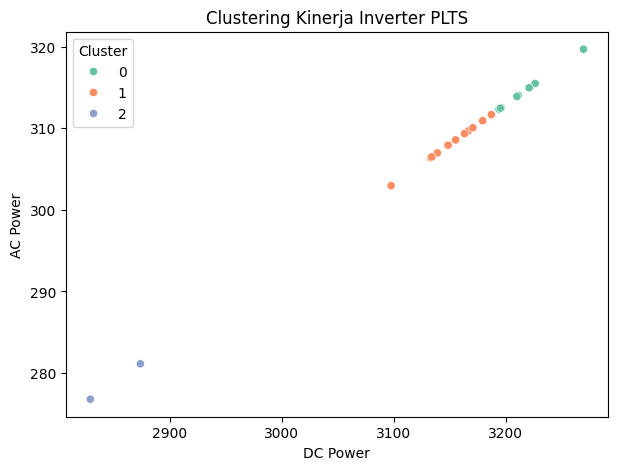

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=cluster_df['DC_POWER'],
    y=cluster_df['AC_POWER'],
    hue=cluster_df['Cluster'],
    palette='Set2'
)
plt.title("Clustering Kinerja Inverter PLTS")
plt.xlabel("DC Power")
plt.ylabel("AC Power")
plt.show()


Interpretasi Hasil

In [10]:
cluster_df.groupby('Cluster').mean()


,DC_POWER,AC_POWER,DAILY_YIELD
Cluster,,,
0,3215.472472,314.431281,3355.784325
1,3151.931045,308.243395,3274.119397
2,2851.359636,278.951506,3188.758257
